# Assignment: K-Nearest Neighbor
## Krishu Wadhwa - euj7fh
## October 09, 2024

Do two questions.

Questions Chosen: **Q0, Q1, and Q2**.

# Question 0

**1. What is the difference between regression and classification?**  
<u>Regression:</u> using data/features/covariates to predict a numeric outcome.  
<u>Classification:</u> using data/features/covariates to predict a categorical outcome.

**2. What is a confusion table? What does it help us understand about a model's performance?**  
A confusion matrix cross-tabulates actual and predicted values, showing both correct and incorrect predictions. It helps evaluate the model's performance by highlighting not just accuracy but also where it is making prediction errors.

**3. Define accuracy. Can an accurate model be flawed for practical use? Explain.**  
Accuracy is the proportion of cases where the model correctly predicts the outcome. However, an accurate model can still be flawed for practical use if it makes errors with significant consequences. For example, a model that predicts loan approvals might be accurate overall, but if it incorrectly approves risky loans, it could lead to financial losses. This shows that even with high accuracy, models may not be flawed, and therefore, not ideal for practical use.

**4. What does the SSE quantify about a particular model?**  
The sum of squared error (SSE) helps answer the question: "How far are the predictions from the true outcomes on the validation/test set?" It quantifies the total difference between actual values and the values predicted by a model (quantifies square error of the model). To compute SSE, for each observation in the validation set, you subtract the predicted value from the actual value, square the result, and then sum these squared differences across all observations. A lower SSE indicates a better fit, meaning the model’s predictions are closer to the actual values. Thus, SSE effectively measures how far off the predictions are from the actual outcomes.

**5. What are overfitting and underfitting?**  
<u>Overfitting:</u> occurs when the model is too complex to reliably explain the phenomenon of interest. This may capture additional unnecessary or irrelevant patterns in the training data, which makes it less reliable for new data.  
<u>Underfitting:</u> occurs when the model is too simple to reliably explain the phenomenon of interest. This may fail to capture important features or patterns in the data.   
Both overfitting and underfitting lead to instances of unreliable models. 

**6. Why does splitting the data into training and testing sets, and choosing `k` by evaluating accuracy or SSE on the test set, improve model performance?**  
Splitting the data into training and testing sets helps the model learn from the training data and then be evaluated on testing/unseen data. This simulates how the model would perform in real-world situations. By selecting `k` based on accuracy or SSE on the test set, we can better ensure that the model works well with new data. This reduces the chances of overfitting or underfitting the training set. Testing the model on testing/unseen data replicates how the model will behave in practical scenarios, providing a more accurate estimate of its performance. This also improves how reliable the model is.

**7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**  
When a model uses class labels, it provides a single, definitive outcome. The strength of this approach is that it is simple and easy to interpret. However, a weakness is that it doesn’t explain the model’s confidence in the prediction. For example, a model may predict Class A, but without probabilities, we don’t know if the confidence was 99% or 51%. In contrast, using a probability distribution over class labels shows the likelihood of each possible outcome. While a strength of this is that it provides a more detailed view of the model’s uncertainty, a weakness is that it can be harder to interpret and may require additional steps to make a final classification. For example, decision-making is harder when probabilities are close, such as 51% vs. 49%.

# Question 1  
This question is a case study for `k` nearest neighbor regression, using the `USA_cars_datasets.csv` data.  
The target variable `y` is `price` and the features are `year` and `mileage`.

**1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.**

In [25]:
# imports 
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the `./data/USA_cars_datasets.csv`

url = 'https://raw.githubusercontent.com/kweuj7fh/DS3001-K-Nearest_Neighbor/refs/heads/main/data/USA_cars_datasets.csv' # url of data
cars = pd.read_csv(url, low_memory=False) # read csv from url
print(cars.shape, '\n') # find number of rows and cols
cars.head() # display first few rows of dataframe

(2499, 13) 



,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [27]:
# keep the following variables and drop the rest: `price`, `year`, `mileage`.

cars = cars.loc[:,['price','year','mileage'] ]
print(cars.shape, '\n') # find number of rows and cols
cars.head() # display first few rows of dataframe

(2499, 3) 



,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [28]:
# are there any `NA`'s to handle?

nan_values = cars.isna().sum()
print("Number of NA's:\n", nan_values)

Number of NA's:
 price      0
year       0
mileage    0
dtype: int64


There are no NaN values in the dataset, as shown by the result of `isna().sum()`, which returned 0 for all columns. Additionally, the dataset contains 2,499 rows, and each variable has 2,499 observations, further confirming that no data is missing.

In [29]:
# look at the head and dimensions of the data

print(cars.shape, '\n') # find number of rows and cols
print(cars.head()) # display first few rows of dataframe
print(cars.describe()) # summary of the data

(2499, 3) 

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


**2. Maxmin normalize year and mileage.**

In [30]:
def maxmin(x): 
    u = (x - min(x)) / (max(x) - min(x)) # subtract min value of the column from each element, then divide by range
    return u

cars['year'] = maxmin(cars['year']) # apply to year
cars['mileage'] = maxmin(cars['mileage']) # apply to mileage

print(maxmin(cars['year']))
print(maxmin(cars['mileage']))

0       0.744681
1       0.808511
2       0.957447
3       0.872340
4       0.957447
          ...   
2494    0.978723
2495    0.957447
2496    0.957447
2497    0.957447
2498    0.957447
Name: year, Length: 2499, dtype: float64
0       0.269287
1       0.187194
2       0.038892
3       0.063016
4       0.006537
          ...   
2494    0.023193
2495    0.033944
2496    0.031037
2497    0.031983
2498    0.030818
Name: mileage, Length: 2499, dtype: float64


**3. Split the sample into ~80% for training and ~20% for evaluation.**

In [31]:
from sklearn.model_selection import train_test_split

y = cars['price'] # set price as y (target)
X = cars.drop('price', axis = 1) # set 'X' as feature set by dropping 'price' from the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100) # split data into 80% training and 20% testing sets

**4. Use the `k`nn algorithm and the training data to predict `price` using `year` and `mileage` for the test set for `k = 3, 10, 25, 50, 100, 300`. For each value of `k`, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase `k`?**

For k:3, SSE: 63059018582.44444, MSE: 126118037.16488889


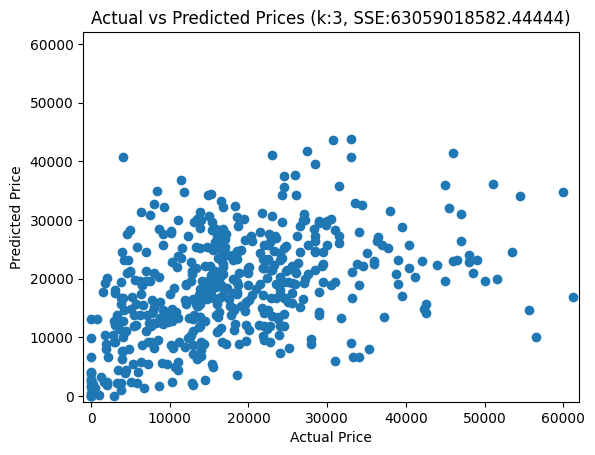

For k:10, SSE: 55326522093.409996, MSE: 110653044.18681999


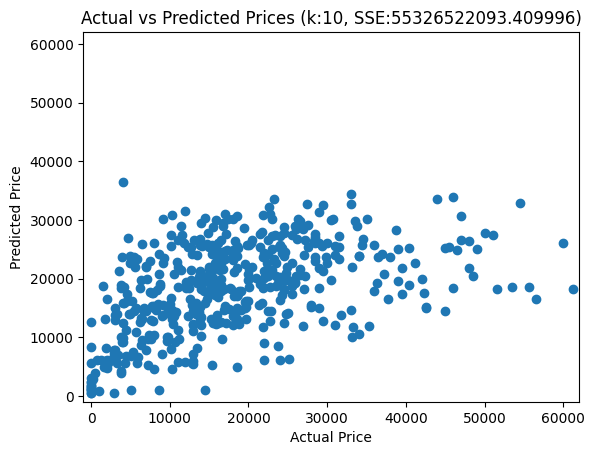

For k:25, SSE: 51587144576.11839, MSE: 103174289.15223679


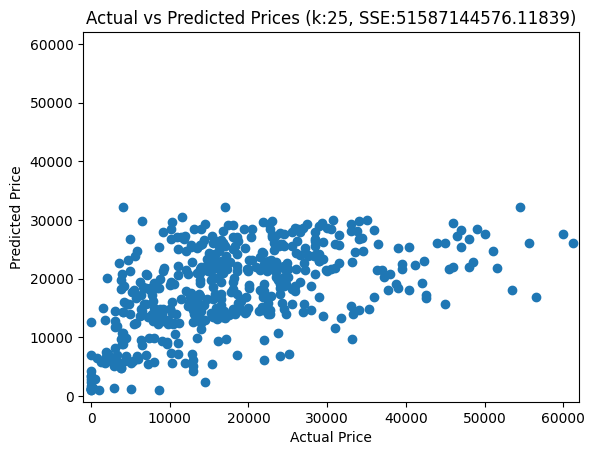

For k:50, SSE: 49842744749.698, MSE: 99685489.499396


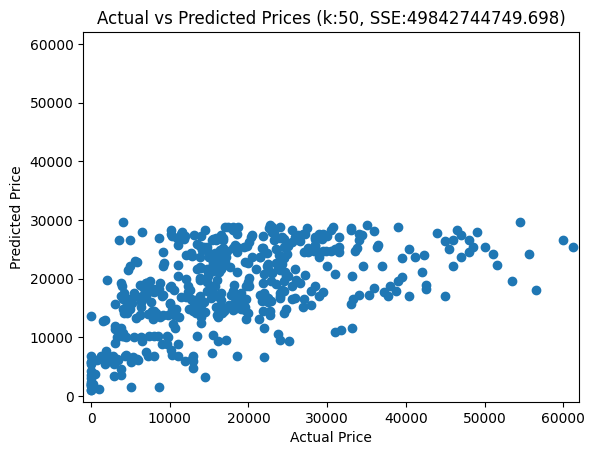

For k:100, SSE: 49138257511.50029, MSE: 98276515.02300058


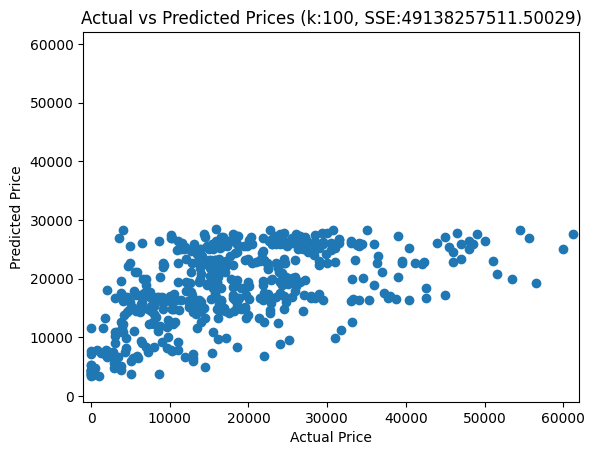

For k:300, SSE: 50238649457.106, MSE: 100477298.914212


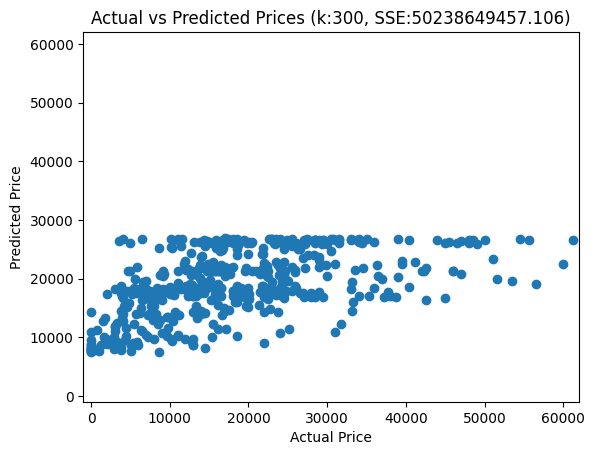

In [38]:
from sklearn.neighbors import KNeighborsRegressor

kvals = [3, 10, 25, 50, 100, 300]
for k in kvals:
     model = KNeighborsRegressor(n_neighbors = k)
     model.fit(X_train,y_train)
     y_hat = model.predict(X_test) # predicted
     SSE = np.sum((y_test-y_hat)**2) # SSE calcualtion
     MSE = SSE / len(y_test) # MSE calculaiton
     print('For k:' + str(k) + ', SSE: ' + str(SSE) + ', MSE: ' + str(MSE))

     plt.scatter(y_test, y_hat)
     plt.title('k: '+str(k)+', SSE: '+str(SSE))

     plt.title('Actual vs Predicted Prices (k:' + str(k) + ', SSE:' + str(SSE) + ')')
     plt.xlabel('Actual Price')
     plt.ylabel('Predicted Price')

     plt.ylim(-1000, 62000)
     plt.xlim(-1000, 62000)
     plt.show()

I noticed that as the value of k increased, the predicted values started to flatten, clustering just below 30,000. There was also significantly less variability in the predictions. Smaller `k` values like `k = 3` seemed to show more variation and follow the data closer. On the other hand, by `k = 300`, the predictions became pretty generalized. It seems that higher `k` values lead to predictions that were too simplified.

**5. Determine the optimal `k` for these data.**

Optimal k:77


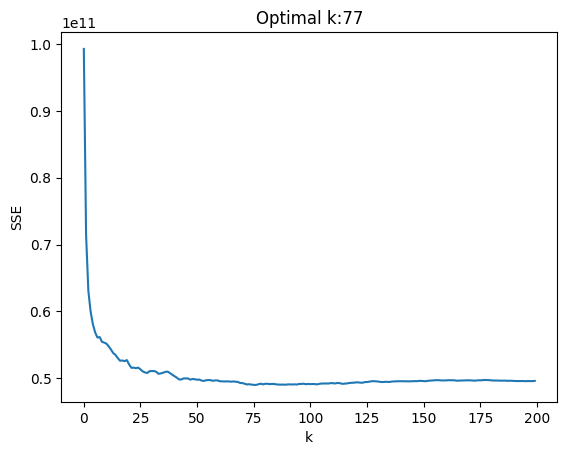

In [39]:
from sklearn.neighbors import KNeighborsRegressor

k_bar = 200 # upper limit
k_grid = np.arange(1, k_bar) # the range of k's to consider, starting at 1
SSE = np.zeros(k_bar) # sse for k

for k in range(k_bar): # loop values and find sse
    knn_fitted = KNeighborsRegressor(n_neighbors = k + 1) # create the knn model
    knn_fitted.fit(X_train, y_train) 
    y_hat = knn_fitted.predict(X_test) # predict values
    SSE[k] = np.sum((y_test-y_hat)**2) # calculate accuracy

SSE_min = np.min(SSE) # lowest recorded sse
min_index = np.argmin(SSE) # find optimal index
k_star = k_grid[min_index] # find optimal value of k
print("Optimal k:" + str(k_star))

plt.plot(np.arange(0, k_bar), SSE) # plot SSE by k
plt.xlabel("k") # k values on x
plt.ylabel('SSE') # SSE on y
plt.title("Optimal k:" + str(k_star)) # title
plt.show()

**6. Describe what happened in the plots of predicted versus actual prices as `k` varied, taking your answer into part 4 into account. (Hint: Use the words "underfitting" and "overfitting".)**

The optimal value of k is approximately 77, which is the best balance between overfitting and underfitting. For lower values of k, such as 3, 10, and 25, the model tends to overfit, as the predictions follow the data too closely and capture noise. This results in higher variance in the predictions. On the other hand, when k reaches 300, the model begins to underfit. The predictions are more generalized, and this leads them to flatten out. As such, many predictions cluster just below 30,000, and the model forms horizontal bunches. This is likely due to averaging too many data points. Additionally, as k increases, the range of predictions shrinks. Outliers influence the outcome less, and predictions tend towards average values. Although this leads to less variability, it could prevent us from understanding key details. At k = 77, the model would most likely achieve the best balance.

# Question 2
This question is a case study for `k` nearest neighbor regression, using the `animals.csv` data.  
The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

**1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?**

In [40]:
# imports 
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the `./data/animals.csv` - called zoo.csv in my folder

url = 'https://raw.githubusercontent.com/kweuj7fh/DS3001-K-Nearest_Neighbor/refs/heads/main/data/zoo.csv' # url of data
animals = pd.read_csv(url, low_memory=False) # read csv from url
print(animals.shape, '\n') # find number of rows and cols
print(animals.columns)
animals.head() # display first few rows of dataframe

(101, 18) 

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [44]:
# For each of the seven class labels, print the values in the class and get a sense of what is included in that group.
classes = list(animals['class'].unique())
print("Animals in each class:")
for class_label in classes:
    print("\nClass: " + str(class_label) + ":")
    print(animals.loc[animals['class'] == class_label, 'animal'].unique())


Animals in each class:

Class: 1:
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Class: 4:
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']

Class: 2:
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']

Class: 7:
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']

Class: 6:
['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'termite' 'wasp']

Class: 5:
['frog' 'newt' 'toad']

Class: 3:
['pitviper' 'seasnake' 'slowworm' 'tortoise' '

Class 1 seems to have mammals, Class 2 seems to include all birds, Class 3 has a lot of reptiles, Class 4 has fish, Class 5 has amphibians, Class 6 has insects, and Class 7 seems to have invertebrates.


Class Distribution:
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


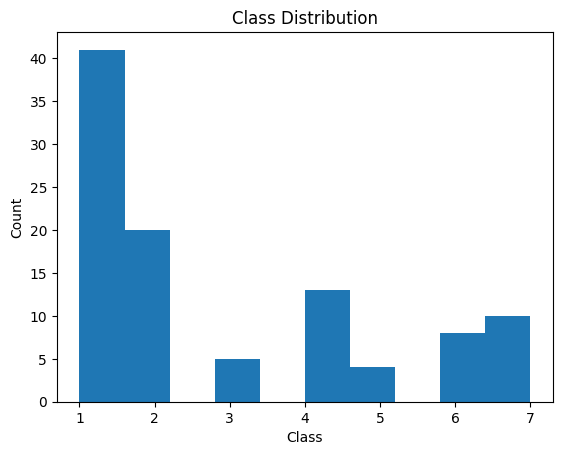

In [51]:
# How big are the classes (class distribution)?

class_distribution = animals['class'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

plt.hist(animals['class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Variation in features:
hair         43
feathers     20
eggs         59
milk         41
airborne     24
aquatic      36
predator     56
toothed      61
backbone     83
breathes     80
venomous      8
fins         17
legs        287
tail         75
domestic     13
catsize      44
dtype: int64


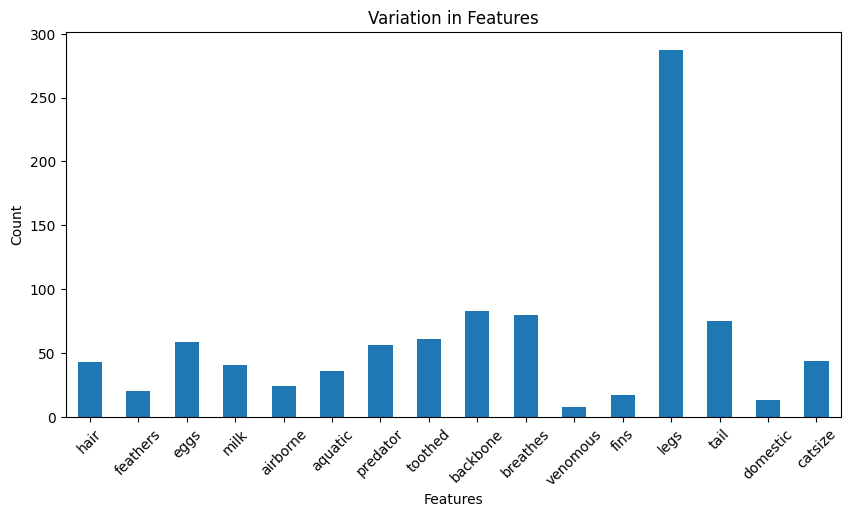

In [60]:
binary_features = animals.drop(columns=['animal', 'class']).sum()
print("\nVariation in features:")
print(binary_features)

plt.figure(figsize=(10, 5))
binary_features.plot(kind = 'bar')
plt.title('Variation in Features')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

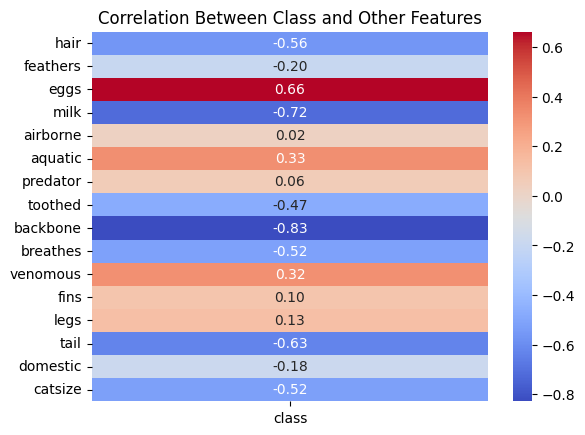

In [63]:
corr_matrix = animals.drop(columns=['animal']).corr()
class_corr = corr_matrix[['class']].drop(index='class')
sns.heatmap(class_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Class and Other Features')
plt.show()

**2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)**

**3. Using all of the variables, build a `K`-NN classifier. Explain how you select `k`.**

**4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?.**

**5. Use only `milk`, `aquatic`, and `airborne` to train a new `K`-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.**